In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

### Read in df_full.csv, generated by inspire_data_cleaning

In [2]:
df = pd.read_csv('df_full.csv')
df.set_index(df.Author.values, inplace=True)
df.drop('Author', axis=1, inplace=True)
print('shape:', df.shape)
print(list(df.columns))
df.head()

shape: (67478, 17)
['Total_papers', 'Cites_min', 'Cites_max', 'Cites_mean', 'Year_first', 'Year_last', 'Num_authors_min', 'Num_authors_max', 'Num_authors_mean', 'cpy_max', 'cpy_mean', 'Lifespan', 'Productivity', 'collab_cpy_mean_mean', 'collab_cpy_mean_max', 'collab_cpy_max_mean', 'collab_cpy_max_max']


,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"'t Hooft, G.",156,0,4781,264.044872,1971,2018,1,5,1.096154,99.604167,7.035821,48,3.250000,4.113859,7.362778,51.224900,173.105263
"Aaij, R.",3,0,2,0.666667,2010,2015,1,1,1.000000,0.333333,0.111111,6,0.500000,0.000000,0.000000,0.000000,0.000000
"Aalbers, J.",3,0,1,0.666667,2013,2019,1,4,2.000000,0.500000,0.277778,7,0.428571,1.504912,2.936958,10.460784,28.882353
"Aali-Javanangrouh, M.",4,0,3,1.750000,2014,2016,2,2,2.000000,0.428571,0.307143,3,1.333333,0.557216,0.557216,5.142857,5.142857
"Aalsma, L.",6,0,25,9.500000,2017,2019,1,4,2.666667,8.333333,3.222222,3,2.000000,3.539349,6.873180,28.375000,69.333333


In [3]:
df.describe()

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
count,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000,67478.000000
mean,21.800691,1.337206,115.366682,19.248636,1996.750971,2010.725777,1.802084,4.778431,3.180914,7.179494,1.457253,14.974807,1.379598,1.719825,3.957559,14.386221,53.455771
std,40.549917,4.938268,327.367197,28.456373,15.082686,11.468256,1.040546,1.365551,1.048826,15.883191,1.819260,12.568157,1.241665,1.266877,3.628622,15.402586,75.510356
min,3.000000,0.000000,0.000000,0.000000,1927.000000,1937.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.041096,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,14.000000,5.142857,1986.000000,2008.000000,1.000000,4.000000,2.444444,1.000000,0.369212,5.000000,0.600000,0.829221,1.577410,5.236362,12.072090
50%,8.000000,0.000000,38.000000,11.923077,2000.000000,2016.000000,1.000000,5.000000,3.136364,2.923077,0.893463,11.000000,1.000000,1.457391,3.046941,11.037236,31.181818
75%,21.000000,1.000000,102.000000,23.759394,2009.000000,2019.000000,2.000000,6.000000,3.909091,7.533333,1.887946,21.000000,1.714286,2.300646,5.272136,19.248691,65.250000
max,1198.000000,356.000000,15259.000000,1584.333333,2019.000000,2020.000000,6.000000,6.000000,6.000000,713.066667,53.494814,81.000000,30.717949,22.970751,50.503472,713.066667,713.066667


### Basic cuts on Cites_max and Num_authors

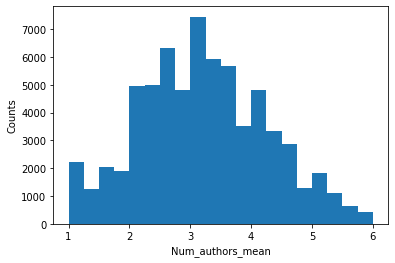

In [4]:
plt.hist(df.Num_authors_mean, bins=20)
plt.xlabel('Num_authors_mean')
plt.ylabel('Counts')
plt.show()

In [5]:
df = df.loc[((df.Cites_mean > 0) & (df.Cites_max > 0) & 
            (df.Num_authors_max > 1) & (df.Num_authors_min < 6))]
df = df.loc[(df.Num_authors_mean < 5)]

### Cutting by Year_first, which has many famous authors blatantly missing entries (e.g. R. Feynman)

In [303]:
df.loc[(df.Year_first < 1960) & (df.Total_papers <= 20)].head(10)

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Abashian, A.",6,0,66,15.000000,1957,1992,1,6,3.833333,1.031250,0.246543,36,0.166667,1.150549,1.854654,19.152239,46.500000
"Abrikosov, A.",17,0,34,8.352941,1958,2008,1,6,1.647059,1.789474,0.343766,51,0.333333,0.647911,0.880380,3.365654,5.058824
"Adair, R.",14,0,40,14.285714,1954,1996,1,6,2.571429,0.673469,0.257882,43,0.325581,1.304680,4.633587,6.304753,20.166667
"Alder, K.",10,4,516,82.700000,1956,1978,3,5,3.800000,7.938462,1.444720,23,0.434783,1.004627,1.734035,13.785764,52.583333
"Allcock, G.",11,0,82,19.545455,1956,1981,1,2,1.454545,1.576923,0.377103,26,0.423077,0.173994,0.328380,0.457108,0.875000
"Allton, E.",3,0,40,15.000000,1958,1971,1,2,1.666667,0.634921,0.240880,14,0.214286,0.403404,0.561233,0.905696,1.176471
"Alvarez, L.",13,0,124,33.615385,1949,1989,1,6,3.384615,2.066667,0.613020,41,0.317073,0.772852,2.252661,6.434817,30.312500
"Anderson, H.",6,0,106,28.166667,1955,1982,1,3,2.333333,2.409091,0.569093,28,0.214286,0.547186,0.874810,2.312837,5.142857
"Arns, R.",6,7,21,12.666667,1958,1975,2,6,3.666667,0.403846,0.242369,18,0.333333,0.846058,1.761632,12.701326,46.500000
"Ashkin, J.",5,0,20,5.000000,1954,1970,1,5,2.000000,0.298507,0.078614,17,0.294118,0.373507,0.373507,2.274510,2.274510


In [6]:
df_year = df.loc[(df.Year_first >= 1971)]

### Min and Max cuts on productivity

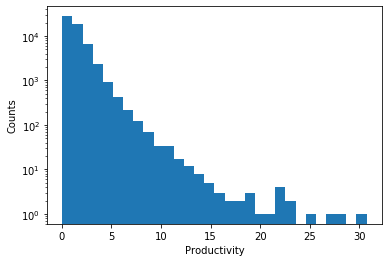

In [305]:
plt.hist(df_year.Productivity, bins=30, log=True)
plt.xlabel('Productivity') 
plt.ylabel('Counts')
plt.show()

Large Productivity outliers may be unfortunate consequence of author name cleaning

In [306]:
df_year.loc[df_year.Productivity >= 15].head(10)

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Capozziello, S.",463,0,1397,40.505400,1992,2019,1,6,3.289417,139.700000,3.713790,28,16.535714,2.108394,11.558681,18.046961,269.133333
"Chen, X.",606,0,753,25.513201,1983,2019,1,6,3.501650,50.200000,2.705786,37,16.378378,2.456699,12.068913,23.221315,189.000000
"Hassanabadi, H.",258,0,45,4.906977,2009,2019,1,6,3.131783,6.500000,0.887658,11,23.454545,0.997304,3.201935,4.481619,30.363636
"Lee, S.",738,0,739,25.188347,1971,2019,1,6,2.901084,36.666667,2.109621,49,15.061224,2.491154,18.870085,19.895915,269.133333
"Li, H.",751,0,780,21.428762,1986,2019,1,6,3.223702,37.142857,1.881180,34,22.088235,2.069473,20.780806,22.020135,713.066667
"Li, X.",957,0,609,15.493208,1979,2019,1,6,3.275862,60.900000,1.509937,41,23.341463,1.842529,10.342313,19.625775,107.487805
"Li, Y.",685,0,728,17.164964,1981,2019,1,6,3.445255,66.181818,2.285482,39,17.564103,2.374944,20.970295,21.674915,235.640000
"Li, Z.",728,0,406,18.256868,1980,2020,1,6,3.532967,23.909091,1.621736,41,17.756098,1.769123,6.645873,17.135121,97.600000
"Liu, J.",701,0,466,19.042796,1984,2020,1,6,3.233951,39.400000,1.749007,37,18.945946,2.350409,17.710167,22.111547,161.900000
"Liu, X.",645,0,822,20.643411,1997,2020,1,6,3.634109,97.600000,2.756105,24,26.875000,2.224038,16.422619,22.846078,154.888889


In [307]:
df_year.loc[df_year.Productivity <= 0.5].head(5)

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Aalbers, J.",3,0,1,0.666667,2013,2019,1,4,2.000000,0.500000,0.277778,7,0.428571,1.504912,2.936958,10.460784,28.882353
"Aaltonen, T.",3,2,48,28.000000,2007,2016,1,5,2.666667,6.800000,3.914286,10,0.300000,1.642617,2.820303,13.080000,21.360000
"Aarnio, P.",4,0,24,7.250000,1984,1995,1,3,2.000000,0.857143,0.259504,12,0.333333,1.231499,1.552935,25.583490,69.062500
"Aaronson, S.",4,0,63,20.250000,2003,2016,1,2,1.250000,12.600000,3.525000,14,0.285714,0.000000,0.000000,0.000000,0.000000
"Abachi, S.",5,0,88,18.600000,1988,2006,1,5,2.000000,3.520000,0.760000,19,0.263158,0.693385,1.172049,3.379412,5.033333


In [7]:
df_prod = df_year.loc[(df_year.Productivity >= 0.5) & ((df_year.Productivity <= 15))]

Total_papers outliers appear consistent with famous authors

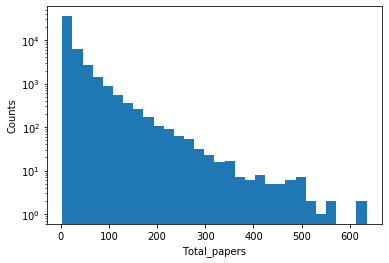

In [309]:
plt.hist(df_prod.Total_papers, bins=30,log=True)
plt.xlabel('Total_papers')
plt.ylabel('Counts')
plt.show()

In [310]:
df_prod.loc[df_prod.Total_papers >= 400].head(10)

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Brandenberger, R.",410,0,2856,55.514634,1982,2019,1,6,2.543902,92.129032,3.301813,38,10.789474,2.859216,13.000000,26.246922,269.133333
"Chakraborty, S.",408,0,263,12.276961,1988,2019,1,6,2.696078,17.166667,1.837549,32,12.750000,2.181474,9.036828,18.775959,390.416667
"Chen, C.",623,0,298,23.502408,1972,2019,1,6,3.001605,22.333333,2.088530,48,12.979167,2.304946,11.445200,20.363770,161.900000
"Chen, J.",472,0,249,16.451271,1972,2019,1,6,3.271186,23.857143,1.542227,48,9.833333,1.985003,7.997286,21.035106,210.705882
"Fabian, A.",481,0,661,47.482328,1985,2019,1,6,3.692308,57.777778,3.182668,35,13.742857,2.448307,6.347308,17.607813,135.045455
"Ferrara, S.",480,0,1760,76.114583,1971,2019,1,6,2.877083,45.128205,3.097423,49,9.795918,3.068353,23.042727,33.461308,635.791667
"Ghosh, S.",533,0,207,10.806754,1972,2020,1,6,2.954972,17.600000,1.232126,49,10.877551,1.546500,8.825258,11.925927,154.888889
"Gupta, R.",415,0,225,23.190361,1971,2019,1,6,3.385542,37.500000,1.765004,49,8.469388,2.060742,14.784524,14.715584,94.307692
"He, X.",414,0,805,28.478261,1985,2019,1,6,2.867150,24.393939,1.931261,35,11.828571,1.819307,4.764735,19.789942,97.600000
"Huang, Y.",404,0,330,15.975248,1993,2019,1,6,2.967822,41.250000,2.018646,27,14.962963,2.453057,19.694524,20.922853,287.347826


### Select for authors most likely not experimentalists

Cut Cites_mean outliers with low Total_papers

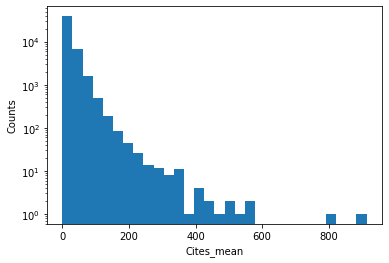

In [311]:
plt.hist(df_prod.Cites_mean, bins=30, log=True)
plt.xlabel('Cites_mean')
plt.ylabel('Counts')
plt.show()

In [312]:
df_prod.loc[(df_prod.Cites_mean >= 300)].head(10)

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Akmal, A.",4,2,1505,432.500000,1997,1999,2,4,3.000000,65.434783,18.705698,3,1.333333,3.465279,3.927189,56.664855,65.434783
"Arkani-Hamed, N.",111,0,6609,336.666667,1995,2019,1,6,3.513514,287.347826,19.694524,25,4.440000,6.595841,23.042727,77.020059,635.791667
"Bruzual, G.",8,0,4217,539.000000,2003,2017,2,6,4.250000,234.277778,30.295883,15,0.533333,2.192093,8.851213,26.532096,234.277778
"Carazzone, J.",4,42,1740,486.750000,1973,1976,2,4,3.000000,37.021277,10.387958,4,1.000000,2.774373,4.997115,43.546759,115.136364
"Davison, A.",3,20,920,322.000000,2008,2008,4,4,4.000000,70.769231,24.769231,1,3.000000,7.813119,15.159854,213.923077,500.230769
"Duvvuri, V.",3,13,1824,796.000000,2003,2004,2,6,4.000000,101.333333,44.822440,2,1.500000,6.256233,8.315989,96.651600,175.545455
"Finkbeiner, D.",45,2,7887,365.400000,1997,2017,1,6,3.177778,328.625000,22.060595,21,2.142857,5.959380,19.694524,62.118590,328.625000
"Foreman-Mackey, D.",4,7,1231,314.750000,2012,2017,2,4,2.750000,136.777778,35.601389,6,0.666667,9.031994,24.367942,103.658333,136.777778
"Grevesse, N.",8,6,1605,327.750000,2003,2014,3,5,4.125000,133.750000,24.541446,12,0.666667,6.349643,23.862493,64.863370,133.750000
"Gribov, L.",6,0,2754,502.333333,1980,1987,1,4,2.833333,74.432432,13.486808,8,0.750000,3.119765,5.814596,48.394223,74.432432


In [8]:
df_exp1 = df_prod[~((df_prod.Cites_mean >= 300) & (df_prod.Total_papers <= 10))]

Cut Cites_max outliers with low Total_papers or Lifespan

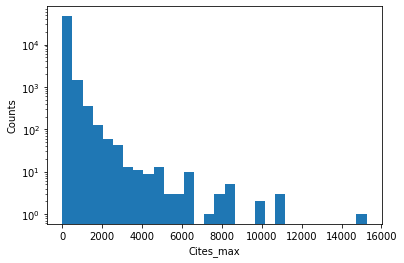

In [314]:
plt.hist(df_exp1.Cites_max, bins=30, log=True)
plt.xlabel('Cites_max')
plt.ylabel('Counts')
plt.show()

In [315]:
df_exp1.loc[(df_exp1.Cites_max >= 5000)].head()

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Arkani-Hamed, N.",111,0,6609,336.666667,1995,2019,1,6,3.513514,287.347826,19.694524,25,4.440000,6.595841,23.042727,77.020059,635.791667
"Cacciari, M.",95,0,6503,217.547368,1991,2019,1,6,2.873684,500.230769,16.531387,29,3.275862,4.727596,17.855556,67.981955,500.230769
"Davis, M.",77,0,7887,178.324675,1971,2019,1,6,3.805195,328.625000,7.471534,49,1.571429,3.318556,22.060595,35.576185,328.625000
"Dimopoulos, S.",148,0,6609,275.662162,1977,2019,1,6,3.060811,287.347826,11.578368,43,3.441860,5.407993,19.694524,62.011929,388.363636
"Dvali, G.",209,0,6609,165.296651,1989,2019,1,5,2.397129,287.347826,8.747672,31,6.741935,4.279604,19.694524,47.817271,287.347826


In [316]:
df_exp1.loc[(df_exp1.Cites_max >= 500) & (df_exp1.Lifespan <= 3)].head()

,Total_papers,Cites_min,Cites_max,Cites_mean,Year_first,Year_last,Num_authors_min,Num_authors_max,Num_authors_mean,cpy_max,cpy_mean,Lifespan,Productivity,collab_cpy_mean_mean,collab_cpy_mean_max,collab_cpy_max_mean,collab_cpy_max_max
"Alloul, A.",7,0,1282,211.285714,2013,2014,1,5,3.857143,160.250000,26.410714,2,3.500000,4.849713,10.385437,83.476296,160.250000
"Beall, G.",3,0,620,239.333333,1981,1983,2,3,2.333333,15.500000,5.983333,3,1.000000,1.852188,2.825757,24.990000,34.480000
"Beiner, M.",5,12,931,232.200000,1973,1975,2,6,4.000000,19.808511,4.959528,3,1.666667,0.917754,2.221044,6.643399,19.808511
"Bengtsson, M.",14,0,2196,246.857143,1986,1988,1,3,2.071429,62.742857,7.090856,3,4.666667,5.797587,15.614182,177.983148,713.066667
"Franse, J.",3,0,583,249.333333,2014,2016,1,4,3.000000,83.285714,35.619048,3,1.000000,7.620944,8.193865,83.285714,83.285714


In [12]:
c1_cites = ((df_exp1.Cites_max >= 500) & (df_exp1.Lifespan <= 3))
c2_cites = ((df_exp1.Cites_max >= 500) & (df_exp1.Total_papers <= 5))
df_exp2 = df_exp1.loc[((~c1_cites) & (~c2_cites))]

### Cut on "Retired" authors for simplicity

In [13]:
retired = ((df_exp2.Lifespan > 12) & (df_exp2.Year_last < 2017))
df_retired = df_exp2.loc[retired]
df_full = df_exp2.loc[~retired]
print(df_retired.shape)

(5815, 17)


### Criteria to generate labels ("No label", "Active", and "Churn")

In [21]:
nolabel = ((df_full.Lifespan <= 12) & (df_full.Year_last >= 2017))
df_nolabel = df_full.loc[nolabel]
df_label = df_full.loc[~nolabel]
label_active = ((df_label.Lifespan > 12) & (df_label.Year_last >= 2017))
label_churn = ((df_label.Lifespan <= 12) & (df_label.Year_last < 2017))
df_label.loc[label_active, 'Label'] = 'Active'
df_label.loc[label_churn, 'Label'] = 'Churn'

Drop unwanted features, create df_final

In [22]:
col_to_drop = ['Total_papers' , 'Cites_min', 'Cites_max', 'Cites_mean', 'Year_first', 'Year_last', 'Num_authors_min',
              'Num_authors_max', 'Lifespan']
df_final = df_label.drop(col_to_drop, axis=1)

Num of no labels: 12494
Num of Active: 13162
Num of Churn: 16890


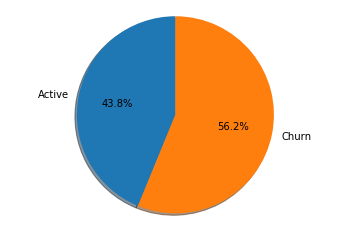

In [23]:
print('Num of no labels:', df_nolabel.shape[0])
print('Num of Active:', df_final.loc[df_final.Label == 'Active'].shape[0])
print('Num of Churn:', df_final.loc[df_final.Label == 'Churn'].shape[0])

# Pie chart
labels = ['Active','Churn']
sizes = [df_final.loc[df_final.Label == 'Active'].shape[0], 
         df_final.loc[df_final.Label == 'Churn'].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### As expected, Year_first is a clear indicator of Active vs. Churn

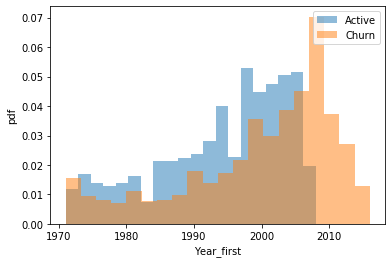

In [24]:
count_active = df_label.loc[df_label.Label == 'Active', 'Year_first']
count_churn = df_label.loc[df_label.Label == 'Churn', 'Year_first']
plt.hist(count_active, bins=20, density=True, alpha=0.5, label='Active')
plt.hist(count_churn, bins=20, density=True, alpha=0.5, label='Churn')
plt.xlabel('Year_first')
plt.ylabel('pdf')
plt.legend(loc='upper right')
plt.show()

### Look at engineered feature distributions

In [26]:
features = ['cpy_max',
     'cpy_mean',
     'Productivity',
     'collab_cpy_mean_mean',
     'collab_cpy_mean_max',
     'collab_cpy_max_mean',
     'collab_cpy_max_max']

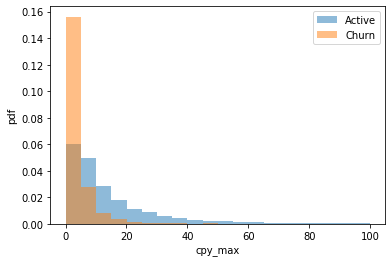

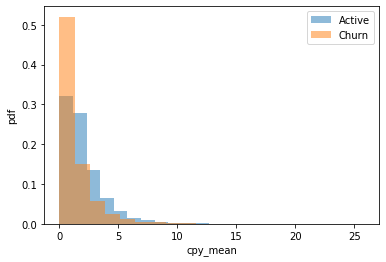

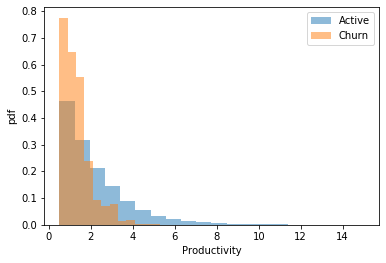

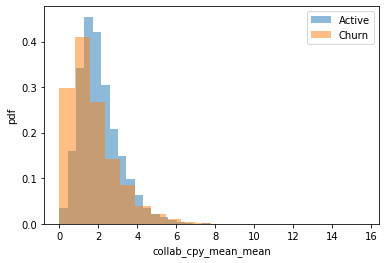

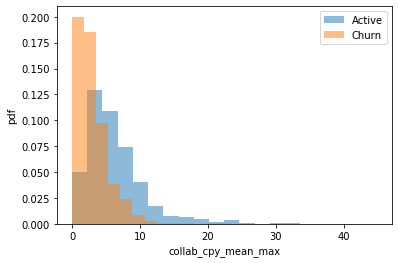

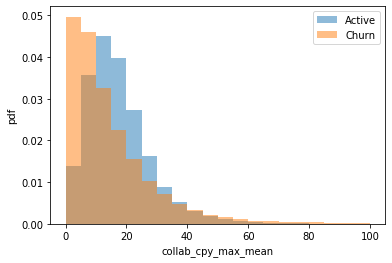

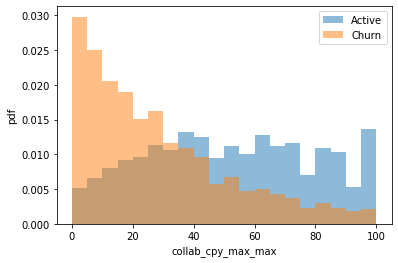

In [27]:
for i in features:
    count_active = df_final.loc[df_final.Label == 'Active', i]
    count_churn = df_final.loc[df_final.Label == 'Churn', i]
    if i not in ['cpy_max', 'collab_cpy_max_mean', 'collab_cpy_max_max']:
        plt.hist(count_active, bins=20, density=True, alpha=0.5, label='Active')
        plt.hist(count_churn, bins=20, density=True, alpha=0.5, label='Churn')
    else:
        # cap off upper range in cpy_max due to large outlier values
        plt.hist(count_active, bins=20, range=(count_active.min(), 100), density=True, alpha=0.5, label='Active')
        plt.hist(count_churn, bins=20, range=(count_churn.min(), 100), density=True, alpha=0.5, label='Churn')
    plt.xlabel(i)
    plt.ylabel('pdf')
    plt.legend(loc='upper right')
    plt.show()

output final dataset

In [32]:
df_final.head()
df_final.to_csv('df_final.csv')
df_nolabel.to_csv('df_nolabel.csv')